In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fantanos-albums-merged-and-filtered/albums_merged_filtered.csv
/kaggle/input/anthony-fantano-album-review-dataset/albums.csv
/kaggle/input/anthony-fantano-album-review-dataset/tracks.csv


# Critical Comparisons: Are Music Critics Full of It?

This was an attempt at using open datasets on Kaggle along with classification and audio feature data from the Spotify API to investigate whether critics display strong preferences towards certain micro-genres.

## Spotify API Data Retrieval

In [4]:
!pip install spotipy
!pip install ratelimiter
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from ratelimiter import RateLimiter

In [177]:
import tensorflow_decision_forests as tfdf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [32]:
import spotipy
import time
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager
=
client_credentials_manager)

def limited(until):
    duration = int(round(until - time.time()))
    print('Rate limited, sleeping for {:d} seconds'.format(duration))
    
ratelimit = RateLimiter(max_calls = 50, period=35, callback=limited)

In [33]:
albums = pd.read_csv("/kaggle/input/anthony-fantano-album-review-dataset/albums.csv")
albums[albums["spotify_id"].isnull() == True]
album_ids = {"album_id": albums[albums["spotify_id"].isnull() == False]["spotify_id"]}
artist_ids = []
table = []
for album in album_ids["album_id"]:
    with ratelimit:
        album_artist_id = sp.album(album)["artists"][0]["id"]
        artist_ids.append(album_artist_id)
        artist_obj = sp.artist(album_artist_id)
        table.append([album, album_artist_id, artist_obj["genres"], artist_obj["popularity"]])
        print("genres: " + str(artist_obj["genres"]))

genres: ['mashup', 'pittsburgh indie']
genres: ['chicago rap', 'rap']
genres: ['brostep', 'complextro', 'edm', 'electro']
genres: ['alternative dance', 'alternative rock', 'indie rock', 'indietronica', 'la indie', 'modern alternative rock', 'modern rock', 'new rave', 'rock']
genres: ['hip hop', 'rap']
genres: []
genres: []
genres: ['alternative dance', 'electro-pop francais', 'electroclash', 'electronica', 'electropop', 'escape room', 'filter house', 'neo-synthpop', 'new rave']
genres: ['indie garage rock', 'indie rock', 'indie surf', 'lo-fi', 'noise pop', 'noise rock', 'nu gaze', 'san diego indie', 'surf punk']
genres: ['chaotic hardcore']
genres: ['modern rock', 'rock']
genres: ['alternative dance', 'alternative rock', 'art pop', 'atlanta indie', 'chillwave', 'dream pop', 'experimental rock', 'indie rock', 'lo-fi', 'modern alternative rock', 'modern rock', 'neo-psychedelic', 'new rave', 'noise pop', 'noise rock', 'shoegaze']
genres: ['indie rock', 'modern rock', 'stomp and holler']
g

In [34]:
until_now = pd.DataFrame(table, columns=["album", "album_artist_id", "genre", "popularity"])
until_now.to_csv("albums_df.csv")

In [37]:
albums["album"] = album_ids["album_id"]
albums["spoti"]

,Unnamed: 0,spotify_id,youtube_id,project_name,artist,project_type,tracks,project_art,year,rating,album
0,0,1B5Lwt0D1ZetRreaCBYobP,GMKfsj1fg5g,all day,girl talk,album,14.0,https://i.scdn.co/image/ab67616d000048510192ca...,2008.0,8.0,1B5Lwt0D1ZetRreaCBYobP
1,1,20r762YmB5HeofjMCiPMLv,Jo4S2qlQGs0,my beautiful dark twisted fantasy,kanye west,album,13.0,https://i.scdn.co/image/ab67616d00004851d9194a...,2010.0,6.0,20r762YmB5HeofjMCiPMLv
2,2,35tQBmq1RblVUzAvfsw5uO,AyzpDXRVbwA,scary monsters and nice sprites,skrillex,ep,9.0,https://i.scdn.co/image/ab67616d0000485181cfaf...,2010.0,7.0,35tQBmq1RblVUzAvfsw5uO
3,3,0X7WyEKdm5afGj1fmD7Blx,lVj-lS3bfUc,broken bells,broken bells,ep,10.0,https://i.scdn.co/image/ab67616d00004851e198b6...,2010.0,5.0,0X7WyEKdm5afGj1fmD7Blx
4,4,5zi7WsKlIiUXv09tbGLKsE,_2RPGAA6p4E,bastard,"tyler, the creator",album,12.0,https://i.scdn.co/image/ab67616d00004851700588...,2019.0,7.0,5zi7WsKlIiUXv09tbGLKsE
...,...,...,...,...,...,...,...,...,...,...,...
3019,3019,6XfFWtshKIYvwjI6qAqR8m,SgjDaPWjzuU,hiss,wormrot,album,21.0,https://i.scdn.co/image/ab67616d0000485106f0de...,2022.0,8.0,6XfFWtshKIYvwjI6qAqR8m
3020,3020,02R7PREL8nCr02CEYLy7YH,NrAlED63uXQ,big time,angel olsen,album,10.0,https://i.scdn.co/image/ab67616d0000485100d144...,2022.0,7.0,02R7PREL8nCr02CEYLy7YH
3021,3021,34uTUAM6SE8Eo6Cv4PRqwD,wSesOY1Aa4A,aethiopes,billy woods,album,13.0,https://i.scdn.co/image/ab67616d00004851c52698...,2022.0,8.0,34uTUAM6SE8Eo6Cv4PRqwD
3022,3022,5doNaJuxzyiybQV0YswLBv,j-3A8FUT-ZQ,jodeki,tricot,album,12.0,https://i.scdn.co/image/ab67616d000048514eb212...,2020.0,7.0,5doNaJuxzyiybQV0YswLBv


In [55]:

until_now["spotify_id"] = [str(x) for x in until_now["album"]]
albums["spotify_id"] = albums["spotify_id"].astype(str)
x = until_now.merge(albums, how="left", on="spotify_id")

In [63]:
df = x[["album_x", "album_artist_id", "genre", "popularity", "project_name", "artist", "project_type", "tracks", "year", "rating"]]
df = df.groupby("album_x").first()

# Further Preprocessing

In [11]:
albums = pd.read_csv("/kaggle/input/anthony-fantano-album-review-dataset/albums.csv")
df = pd.read_csv("/kaggle/input/fantanos-albums-merged-and-filtered/albums_merged_filtered.csv")
num_songs = df.shape[0]

In [12]:
genres_split = [[y.strip("\'") for y in x.strip('][').split(', ')] for x in df["genre"]]
genres_list = [x for l in genres_split for x in l]

In [13]:
genres = {g: [] for g in genres_list}
for genre in genres.keys():
    for i in range(len(genres_split)):
        if any([f == genre for f in genres_split[i]]):
            genres[genre].append(i)

In [14]:
df_copy = df.copy()
for genre in genres.items():
    zeros = np.zeros(num_songs)
    for i in range(num_songs):
        if any([g == i for g in genre[1]]):
            zeros[i] = 1
    df_copy[genre[0]] = zeros

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  import sys


In [109]:
df_copy

,album_x,album_artist_id,genre,popularity,project_name,artist,project_type,tracks,year,rating,...,jazz cubano,stl indie,power metal,modern alternative pop,nwothm,alternative roots rock,balkan folk metal,romanian black metal,romanian metal,slavic metal
0,009EjjwUjtdjvH7UP0wHzi,6styCzc1Ej4NxISL0LiigM,['indie rock'],57,a light for attracting attention,the smile,album,13.0,2022.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00ScsOhm5YDSV7h8e5U8a0,0k8DImIwlWEkJwKTo3xsUy,"['doomgaze', 'post-doom metal']",1,crashing diseases and incurable airplanes,usa out of vietnam,album,5.0,2014.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00wSTrFxoSzA7eeS1UxHgd,1U1el3k54VvEUzo3ybLPlM,"['colombian pop', 'pop']",84,sin miedo (del amor y otros demonios) ∞,kali uchis,album,13.0,2020.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,01G2vIEEdYxsXZyi4NzwyJ,5wZOrGWdg4hq7KIRMupJdI,"['downtempo', 'electronica', 'float house', 'i...",49,galaxy garden,lone,album,12.0,2012.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,01Go8OwdhESlkxPwrx6515,0C0XlULifJtAgn6ZNCW2eu,"['alternative rock', 'dance rock', 'modern roc...",79,pressure machine,the killers,album,18.0,2022.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2416,7ywtDVrT6aKSs4L0zEniYF,73b5VP7BWutUBDx2sna8UW,"['cali rap', 'sacramento hip hop']",53,dark country magic,big blood,album,1.0,2020.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2417,7z4GhRfLqfSkqrj5F3Yt2B,4Gso3d4CscCijv0lmajZWs,"['pop', 'rap', 'trap']",86,heaven or hell,don toliver,album,12.0,2020.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2418,7zCODUHkfuRxsUjtuzNqbd,1Xyo4u8uXC1ZmMpatF05PJ,"['canadian contemporary r&b', 'canadian pop', ...",99,house of balloons,the weeknd,album,9.0,2011.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2419,7zJOyZ9X6Vs4SZASz4uOkY,72acCeElLYGL9nBHcZzX1h,"['art punk', 'crank wave', 'experimental pop',...",33,glitter,no age,track,3.0,2010.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
"""

train, test = train_test_split(df_copy.drop('', axis=1), test_size = 0.1, shuffle = True, random_state = 3)
tf_train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(train, label="rating")
tf_test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(train, label="rating")
model = tfdf.keras.RandomForestModel(verbose=0)
model.fit(tf_train_dataset)
"""

/opt/conda/lib/python3.7/site-packages/tensorflow_decision_forests/keras/core.py:1612: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_dataframe = dataframe.drop(label, 1)


35/35 [==============================] - 17s 66ms/step


[INFO kernel.cc:736] Start Yggdrasil model training
[INFO kernel.cc:737] Collect training examples
[INFO kernel.cc:392] Number of batches: 35
[INFO kernel.cc:393] Number of examples: 2178
[INFO data_spec_inference.cc:290] 1202 item(s) have been pruned (i.e. they are considered out of dictionary) for the column album_artist_id (49 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO data_spec_inference.cc:290] 2178 item(s) have been pruned (i.e. they are considered out of dictionary) for the column album_x (0 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO data_spec_inference.cc:290] 1254 item(s) have been pruned (i.e. they are considered out of dictionary) for the column artist (42 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO data_spec_inference.cc:290] 1062 item(s) have been pruned (i.e. they are considered out of dictionary) for the column genre (60 item(s) left) because min_value_c

In [15]:
df = df_copy.drop(["album_x", "album_artist_id", "genre", "project_name", ''], axis=1)
artists = pd.get_dummies(df["artist"])
project_type = pd.get_dummies(df["project_type"])
df = df.join(artists)
df = df.join(project_type)
df = df.drop(["artist", "project_type"], axis=1)

In [158]:
from sklearn.model_selection import train_test_split
train_dataset, test_dataset = train_test_split(df, test_size = 0.15, shuffle = True, random_state = 3)
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('rating')
test_labels = test_features.pop('rating')

In [159]:
train_features

,popularity,tracks,year,indie rock,doomgaze,post-doom metal,colombian pop,pop,downtempo,electronica,...,zillakami,zola jesus,zombi,zomby,zs,album,ep,mixtape,redux,track
2344,54,7.0,2017.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1860,54,1.0,2015.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1297,67,12.0,2022.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
59,71,12.0,2020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
472,2,7.0,2010.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2304,69,10.0,2006.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
968,54,10.0,2021.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1667,46,11.0,2010.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1688,45,11.0,2012.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [162]:
inputs = {}
for name, column in df.items():
    dtype = tf.int64
    inputs[name] = tf.keras.Input(shape=(), name=name, dtype=dtype)

In [165]:
preprocessed = []

for name in df.columns[3:]:
    inp = inputs[name]
    inp = inp[:, tf.newaxis]
    float_value = tf.cast(inp, tf.float32)
    preprocessed.append(float_value)

preprocessed

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_1')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_2')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_3')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_4')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_5')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_6')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_7')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_8')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_9')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_10')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_11')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_12')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by laye

In [169]:
def stack_dict(inputs, fun=tf.stack):
    values = []
    for key in sorted(inputs.keys()):
        values.append(tf.cast(inputs[key], tf.float32))

    return fun(values, axis=-1)

numeric_feature_names = ["popularity", "tracks", "year"]
numeric_features = df[numeric_feature_names]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(stack_dict(dict(numeric_features)))

numeric_inputs = {}
for name in numeric_feature_names:
    numeric_inputs[name] = inputs[name]

numeric_inputs = stack_dict(numeric_inputs)
numeric_normalized = normalizer(numeric_inputs)

preprocessed.append(numeric_normalized)

preprocessed

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_1')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_2')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_3')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_4')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_5')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_6')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_7')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_8')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_9')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_10')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_11')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_12')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by laye

# OLS

In [217]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

linear_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units = 1)
])

[[5.5811859e+01 1.2338843e+01 2.0158207e+03 ... 2.9654840e-02
  4.8614494e-04 2.1876523e-02]]


In [218]:
linear_model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_8 (Normalizati (None, 2420)              4841      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 2421      
Total params: 7,262
Trainable params: 2,421
Non-trainable params: 4,841
_________________________________________________________________


In [219]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [220]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 21.2 s, sys: 3.57 s, total: 24.8 s
Wall time: 20.8 s


In [221]:
test_results = {}
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [230]:
test_results = linear_model.predict(test_features)

In [ ]:
rizz = test_features.copy()
test_results = (test_results - test_results.mean())/test_results.std()
rizz["prediction"] = max(abs(test_results) * train_labels.mean() + train_labels.std(), 10)
rizz

In [262]:
import statsmodels.api as sm

train_df, test_df = train_test_split(df, test_size = 0.15, shuffle = True, random_state = 3)

train_X = train_df.copy()
test_X = test_df.copy()

train_y = train_X.pop('rating')
test_y = test_X.pop('rating')
train_mean = train_y.mean()
train_std = train_y.std()
train_y = (train_y - train_mean)/train_std

model = sm.OLS(train_y, train_X).fit()

In [269]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     1.425
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           3.11e-08
Time:                        03:34:40   Log-Likelihood:                -1682.3
No. Observations:                2057   AIC:                             5917.
Df Residuals:                     781   BIC:                         1.310e+04
Df Model:                        1275                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
popularity                                                          0.7091      0.490      1.448      0.148      -0.252       1.670
tracks                                                              0.0015      0.009      0.170      0.865      -0.015       0.018
year                                                               -0.0109      0.009     -1.191      0.234      -0.029       0.007
indie rock                                                          0.9318      0.606      1.538      0.124      -0.257       2.121
doomgaze                                                            1.6474      1.417      1.162      0.245      -1.135       4.430
post-doom metal                                                     9.0256      5.789      1.559      0.119      -2.338      20.390
colombian pop                                                     -12.8699      9.527     -1.351      0.177     -31.571       5.831
pop                                                                -0.6047      1.259     -0.480      0.631      -3.077       1.867
downtempo                                                          -4.1314      2.831     -1.459      0.145      -9.688       1.425
electronica                                                        -3.8803      2.858     -1.358      0.175      -9.490       1.729
float house                                                         0.3094      0.582      0.531      0.595      -0.834       1.453
intelligent dance music                                            -3.6372      2.285     -1.592      0.112      -8.122       0.848
lo-fi house                                                         0.0612      0.675      0.091      0.928      -1.264       1.387
microhouse                                                          1.5512      1.033      1.501      0.134      -0.478       3.580
uk bass                                                             5.1158      3.481      1.469      0.142      -1.718      11.950
wonky                                                               0.3090      0.234      1.321      0.187      -0.150       0.768
alternative rock                                                    2.4625      1.869      1.318      0.188      -1.206       6.131
dance rock                                                          0.5862      0.266      2.201      0.028       0.063       1.109
modern rock                                                        -7.3738      4.934     -1.495      0.135     -17.059       2.311
permanent wave                                                    -11.1306      7.606     -1.463      0.144     -26.061       3.799
rock                                           

In [264]:
test_rizz = model.predict(test_X)

In [267]:
rizz = test_X.copy()
rizz["prediction"] = test_rizz * train_std + train_mean
rizz["actual"] = test_y

In [285]:
f = rizz[rizz["prediction"] <= 10][rizz["prediction"] > 0]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [293]:
f["error"] = f["prediction"] - f["actual"]

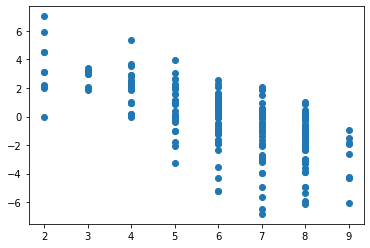

In [300]:
import matplotlib.pyplot as plt
plt.scatter(x = f["actual"],y = f["error"])

# SVC

In [7]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [5]:
clf = RidgeClassifier(tol=1e-2, solver="sparse_cg")

In [16]:
train_df, test_df = train_test_split(df, test_size = 0.15, shuffle = True, random_state = 3)

train_X = train_df.copy()
test_X = test_df.copy()

train_y = train_X.pop('rating')
test_y = test_X.pop('rating')

In [19]:
clf.fit(train_X, train_y)

RidgeClassifier(solver='sparse_cg', tol=0.01)

In [22]:
pred = clf.predict(test_X)
error = pred - test_y

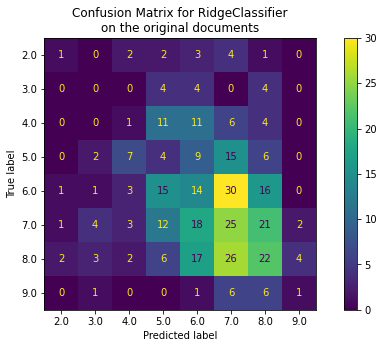

In [35]:


fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(test_y, pred, ax=ax)
ax.xaxis.set_ticklabels(pd.get_dummies(test_y).columns)
ax.yaxis.set_ticklabels(pd.get_dummies(test_y).columns)
_ = ax.set_title(
    f"Confusion Matrix for {clf.__class__.__name__}\non the original documents"
)